In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [2]:
# Load the dataset
file_path = 'Dataset_of_Diabetes.csv'
data = pd.read_csv(file_path)
print(data.head())

    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


In [3]:
data.shape

(1000, 14)

In [4]:
# Initial Dataset Analysis
print("Initial Dataset Analysis")
print(data.isnull().sum())


Initial Dataset Analysis
ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [5]:
print(data.info())  # Structure of dataset and null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB
None


In [6]:
print(data.describe())  # Summary statistics


                ID     No_Pation          AGE         Urea           Cr  \
count  1000.000000  1.000000e+03  1000.000000  1000.000000  1000.000000   
mean    340.500000  2.705514e+05    53.528000     5.124743    68.943000   
std     240.397673  3.380758e+06     8.799241     2.935165    59.984747   
min       1.000000  1.230000e+02    20.000000     0.500000     6.000000   
25%     125.750000  2.406375e+04    51.000000     3.700000    48.000000   
50%     300.500000  3.439550e+04    55.000000     4.600000    60.000000   
75%     550.250000  4.538425e+04    59.000000     5.700000    73.000000   
max     800.000000  7.543566e+07    79.000000    38.900000   800.000000   

             HbA1c         Chol           TG          HDL          LDL  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      8.281160     4.862820     2.349610     1.204750     2.609790   
std       2.534003     1.301738     1.401176     0.660414     1.115102   
min       0.900000     0.000

In [7]:

print("Unique values in 'CLASS' column before cleaning:", data['CLASS'].unique())
# Remove trailing spaces in the 'CLASS' column
data['CLASS'] = data['CLASS'].str.strip()
print("Unique values in 'CLASS' column after cleaning:", data['CLASS'].unique())

Unique values in 'CLASS' column before cleaning: ['N' 'N ' 'P' 'Y' 'Y ']
Unique values in 'CLASS' column after cleaning: ['N' 'P' 'Y']


In [8]:
# Encode the 'Gender' and 'CLASS' columns
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])
print("Unique values in 'CLASS' column after encoding:", data['CLASS'].unique())

Unique values in 'CLASS' column after encoding: [0 1 2]


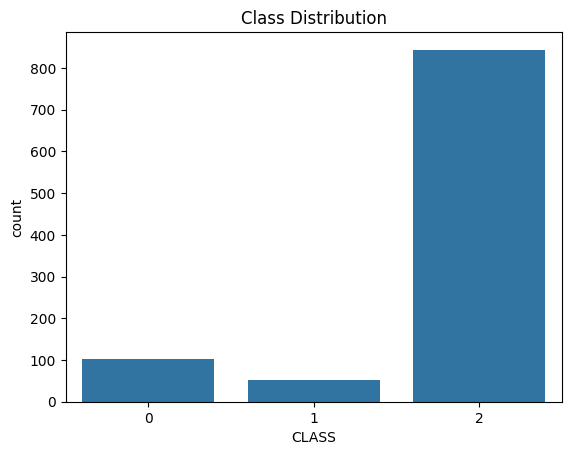

In [9]:
# Check for class balance
sns.countplot(x='CLASS', data=data)
plt.title('Class Distribution')
plt.show()

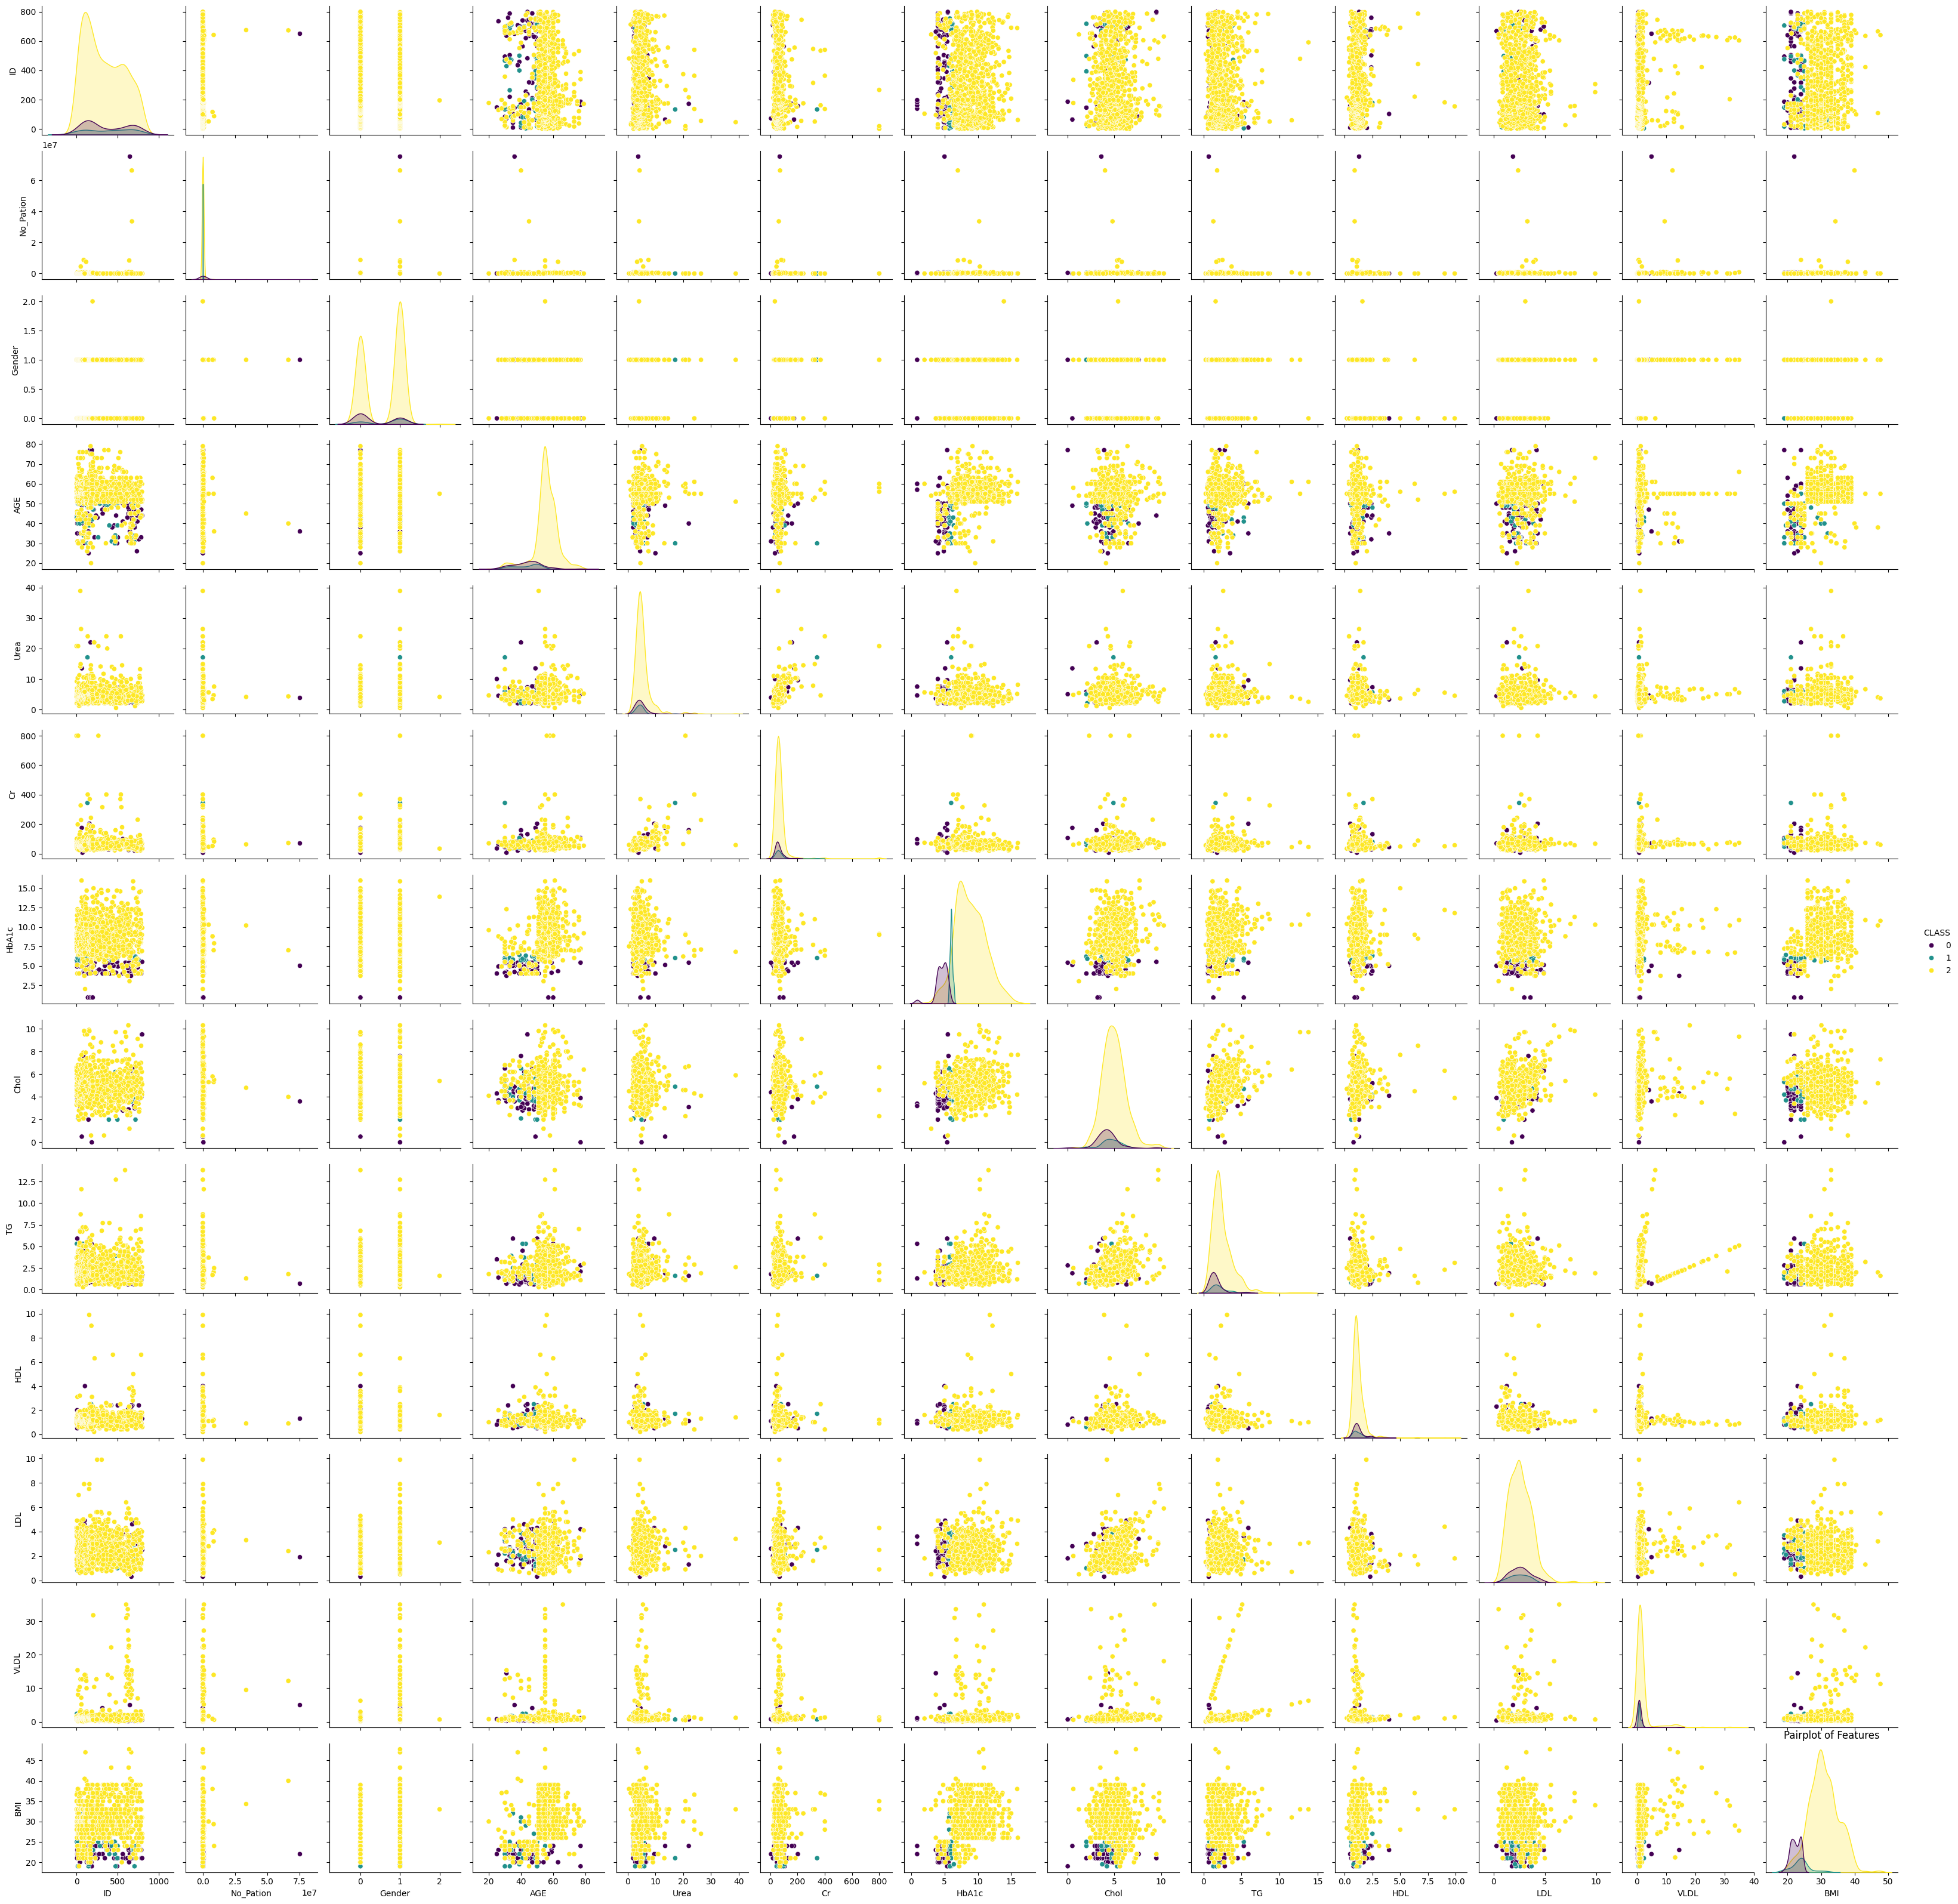

In [10]:
# Pairplot for initial data exploration
sns.pairplot(data, hue='CLASS', palette='viridis')
plt.title('Pairplot of Features')
plt.show()

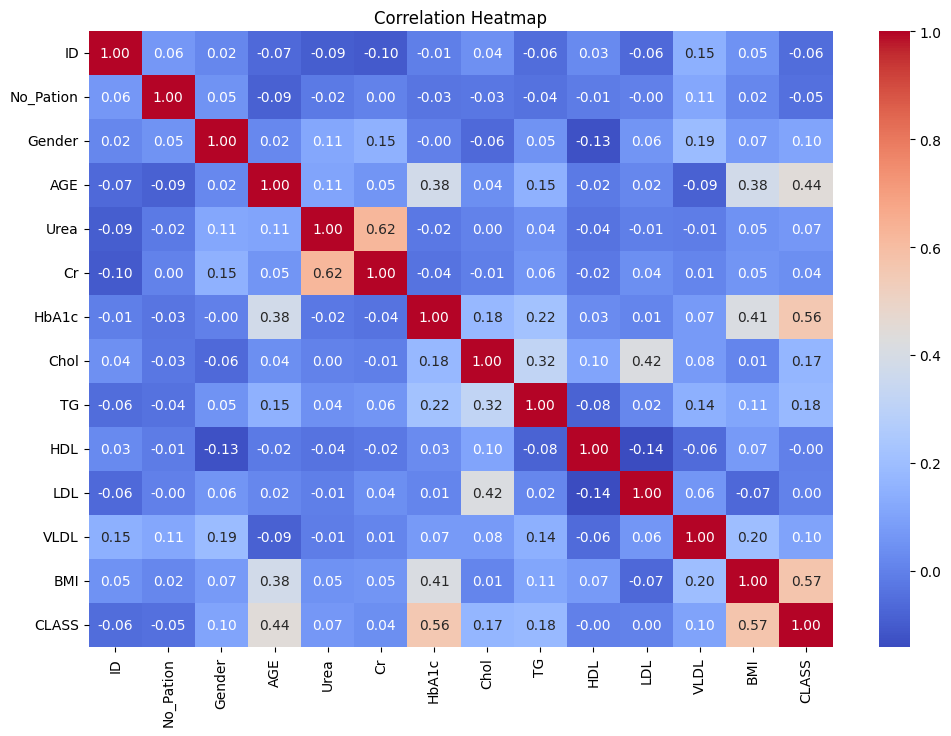

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Separate features and target
X = data.drop(columns=['ID', 'No_Pation', 'CLASS'])
y = data['CLASS']

In [15]:
# Standardize and Normalize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [16]:
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X_standardized)

In [17]:
# Resampling techniques
oversample = SMOTE(sampling_strategy='auto', random_state=42)
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
pipeline = Pipeline(steps=[('o', oversample), ('u', undersample)])
X_resampled, y_resampled = pipeline.fit_resample(X_normalized, y)

In [18]:
# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [19]:

# Define hyperparameter grids
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100 ],
        'max_depth': [10, 15, 20, 25],
        'min_samples_split': [5, 10, 15],
        'min_samples_leaf': [5, 10, 15],
        'bootstrap': [True, False]
    },
    "Decision Tree": {
        'max_depth': [5, 10, 15],
        'min_samples_split': [10, 15],
        'min_samples_leaf': [10, 15]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [5, 7, 9, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

In [20]:
# Models to evaluate
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

In [21]:
# Perform GridSearchCV for each model
best_estimators = {}
for model_name, model in models.items():
    print(f"\nPerforming Grid Search for {model_name}")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")


Performing Grid Search for Random Forest
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score for Random Forest: 0.993421052631579

Performing Grid Search for Decision Tree
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10}
Best cross-validation score for Decision Tree: 0.9874956574604828

Performing Grid Search for K-Nearest Neighbors
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for K-Nearest Neighbors: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score for K-Nearest Neighbors: 0.9789408546117769

Performing Grid Search for Support Vector Machine
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for 


Training and evaluating Random Forest
Validation Accuracy: 0.9841897233201581
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       168
           1       0.99      1.00      0.99       166
           2       1.00      0.95      0.98       172

    accuracy                           0.98       506
   macro avg       0.98      0.98      0.98       506
weighted avg       0.98      0.98      0.98       506

Confusion Matrix:
[[168   0   0]
 [  0 166   0]
 [  6   2 164]]


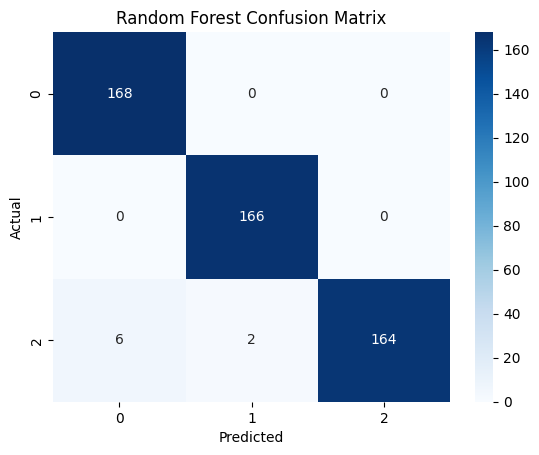


Training and evaluating Decision Tree
Validation Accuracy: 0.9881422924901185
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       168
           1       0.99      0.99      0.99       166
           2       0.99      0.97      0.98       172

    accuracy                           0.99       506
   macro avg       0.99      0.99      0.99       506
weighted avg       0.99      0.99      0.99       506

Confusion Matrix:
[[168   0   0]
 [  0 165   1]
 [  3   2 167]]


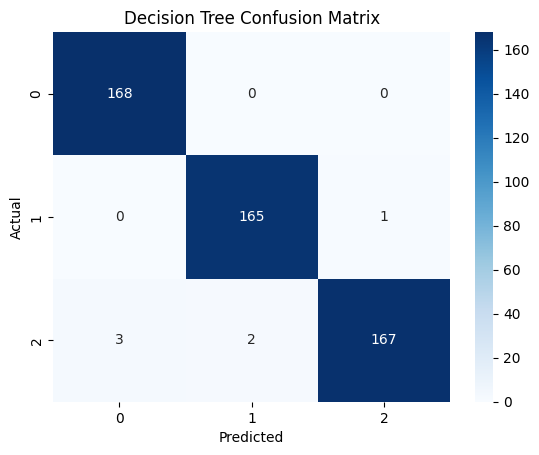


Training and evaluating K-Nearest Neighbors
Validation Accuracy: 0.9723320158102767
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       168
           1       0.95      1.00      0.97       166
           2       1.00      0.92      0.96       172

    accuracy                           0.97       506
   macro avg       0.97      0.97      0.97       506
weighted avg       0.97      0.97      0.97       506

Confusion Matrix:
[[168   0   0]
 [  0 166   0]
 [  5   9 158]]


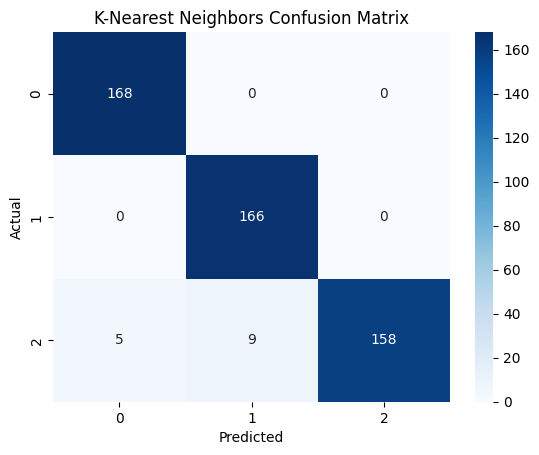


Training and evaluating Support Vector Machine
Validation Accuracy: 0.974308300395257
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       168
           1       0.97      1.00      0.98       166
           2       1.00      0.93      0.96       172

    accuracy                           0.97       506
   macro avg       0.97      0.97      0.97       506
weighted avg       0.98      0.97      0.97       506

Confusion Matrix:
[[167   1   0]
 [  0 166   0]
 [  7   5 160]]


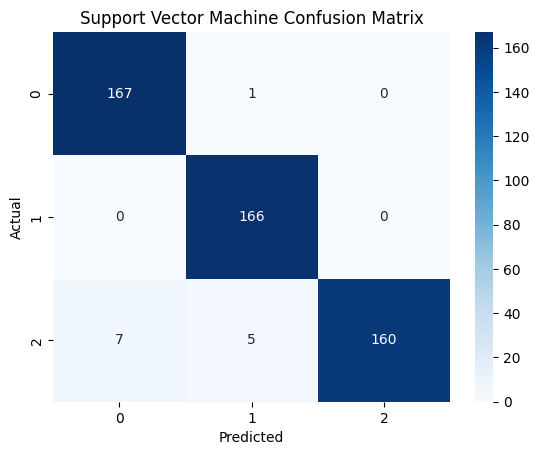

In [22]:
# Train and evaluate each best model on the validation set
for model_name, model in best_estimators.items():
    print(f"\nTraining and evaluating {model_name}")
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_val_pred)
    classification_rep_val = classification_report(y_val, y_val_pred, zero_division=1)
    conf_matrix_val = confusion_matrix(y_val, y_val_pred)

    print(f"Validation Accuracy: {accuracy_val}")
    print("Classification Report:")
    print(classification_rep_val)
    print("Confusion Matrix:")
    print(conf_matrix_val)
    sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Final testing of Random Forest on the test set
Test Accuracy: 0.9861932938856016
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       177
           1       1.00      1.00      1.00       170
           2       1.00      0.96      0.98       160

    accuracy                           0.99       507
   macro avg       0.99      0.99      0.99       507
weighted avg       0.99      0.99      0.99       507

Confusion Matrix:
[[177   0   0]
 [  0 170   0]
 [  7   0 153]]


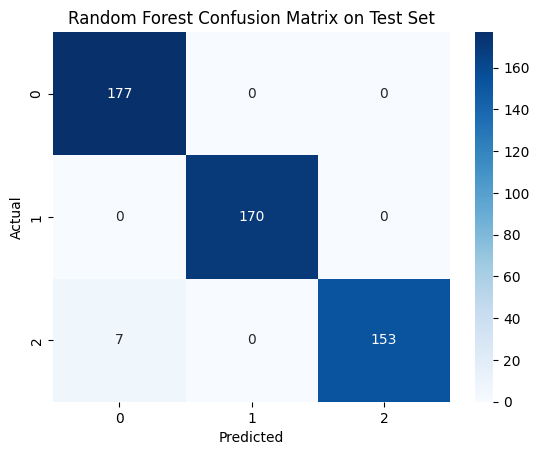

In [23]:
# Final testing of Random Forest on the test set
best_rf = best_estimators["Random Forest"]
best_rf.fit(X_train, y_train)
y_test_pred = best_rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred, zero_division=1)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("\nFinal testing of Random Forest on the test set")
print(f"Test Accuracy: {accuracy_test}")
print("Classification Report:")
print(classification_rep_test)
print("Confusion Matrix:")
print(conf_matrix_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix on Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()